Rafael Beltran Hernandez

In [22]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

# Problema de la barra templada

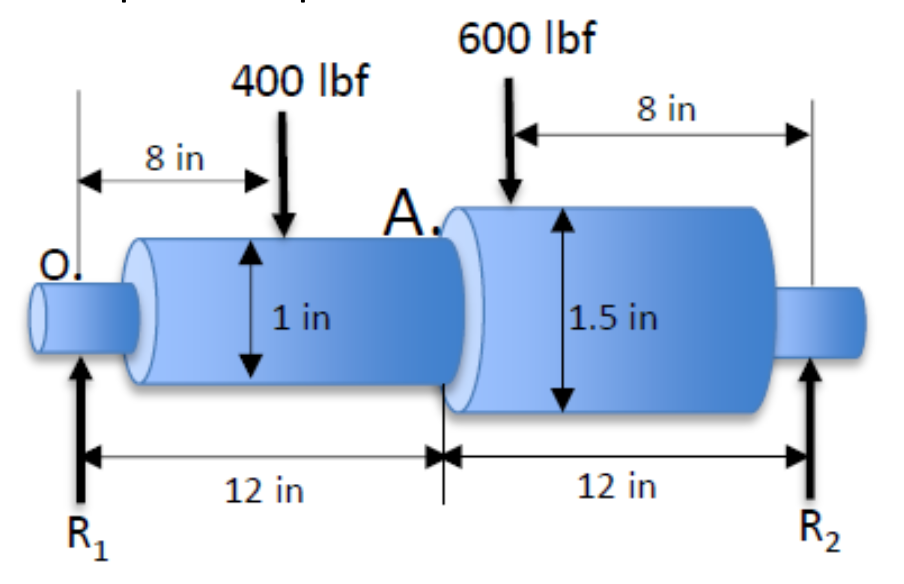

In [2]:
Image(filename='Imagenes Tareas/S8 P1.png')

En primer lugar se calculan las reacciones usando las ecuaciones de ecuaciones de equilibio y sumatoria de fuerzas en el eje vertical

In [3]:
# Momentos
r2 = round((8*400 + 16*600 )/24,2)# lb·f
r1 = round(1000-r2,2)
print('Las reacciones son',r1,r2,'lb·f para r1 y r2 respectivamente') 

Las reacciones son 466.67 533.33 lb·f para r1 y r2 respectivamente


Ahora se encontraran los factores de Marin para encontrar el valor de $S_e$, teniendo en cuenta los acabados de manufactura, tipo de carga, tamaño, superficie y confiabilidad. 

In [4]:
## Factores de Marin
S_ut = 260 # ksi
se_prima = 0.5* S_ut
aa, bb = 1.34, -0.085
ka = aa*(S_ut**(bb))
d = 1 #in
kb = 0.9*(d**(-0.157))
kc, kd = 1, 1
ke = 0.702 # Tomado de la tabla 6-5 del libro de Shigley 
print('Los factores de marin en orden alfabetico son',ka,kb,kc,kd,ke)
print('El valor de Se es de',se_prima*ka*kb*ke,'ksi')

Los factores de marin en orden alfabetico son 0.8352799635206355 0.9 1 1 0.702
El valor de Se es de 68.60488452380388 ksi


Ahora se tiene que encontrar el valor del esfuerzo normal teniendo en cuenta la conentración de esfuerzos a causa del cambio de radio del eje. El valor del momento en el punto A se encontró usando el software en linea Skyciv. A continuación tambiñen se encuentra el diagrama de momentos encontrado con este programa. 

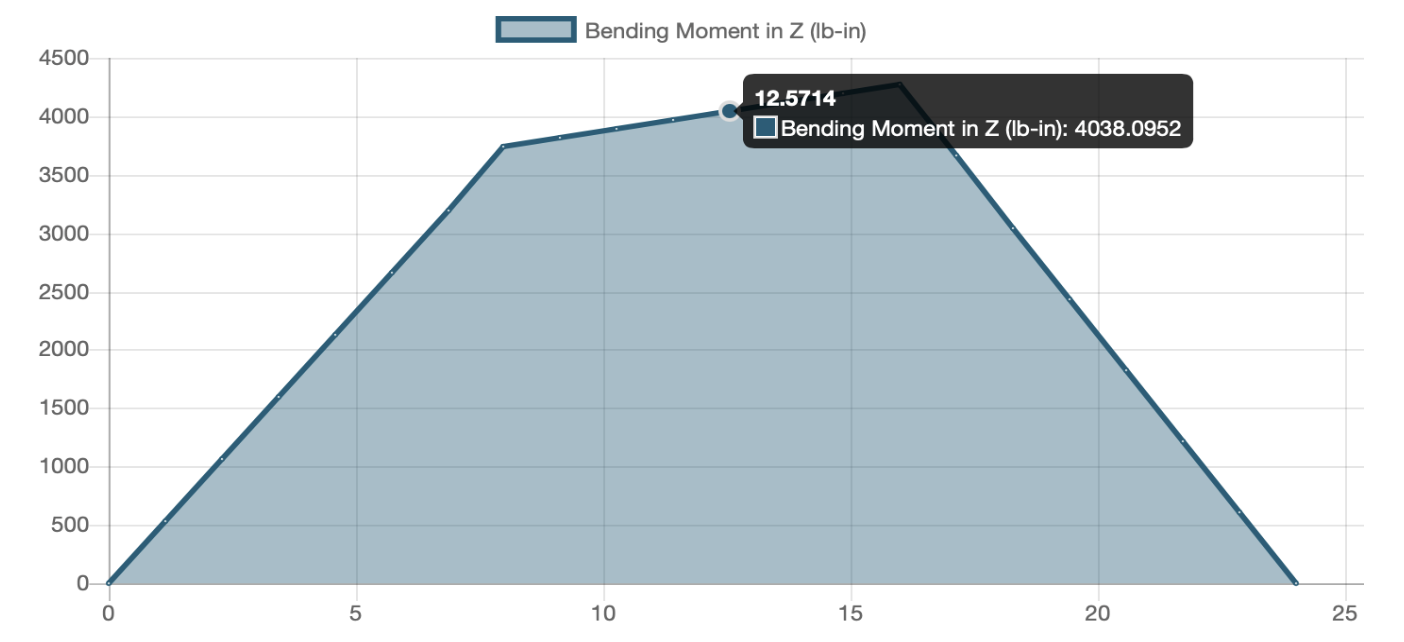

In [5]:
Image(filename='Imagenes Tareas/Momentos S12 P1.png')

In [6]:
## Concentración de esfuerzo
q = 0.96
r = d/2
I = np.pi * (r**4)/4
M = 4038.09
s_nom = 0.5*M/I # Esfuerzo nominal por flexión en el punto de mayor momento
kt = 1.9 # Tomado del apendice del libro de shigley
kf = 1+ q*(kt - 1)
s_max = s_nom*kf
print('El esfuerzo máximo en ksi es de',round(s_max/1000,2))

El esfuerzo máximo en ksi es de 76.67


A continuación se encontrara la esperanza de vida total de la pieza

In [7]:
from numpy import log10, floor
s_max= round(s_max/1000,2)
f = 0.76
a = (f*S_ut)**2/(30.37)
b = -log10(f*S_ut/30.37)/3
N = floor((s_max/a)**(1/b))
print('La vida útil de la pieza es de',N,'ciclos')

La vida útil de la pieza es de 32852.0 ciclos


# Eje 1045 HR

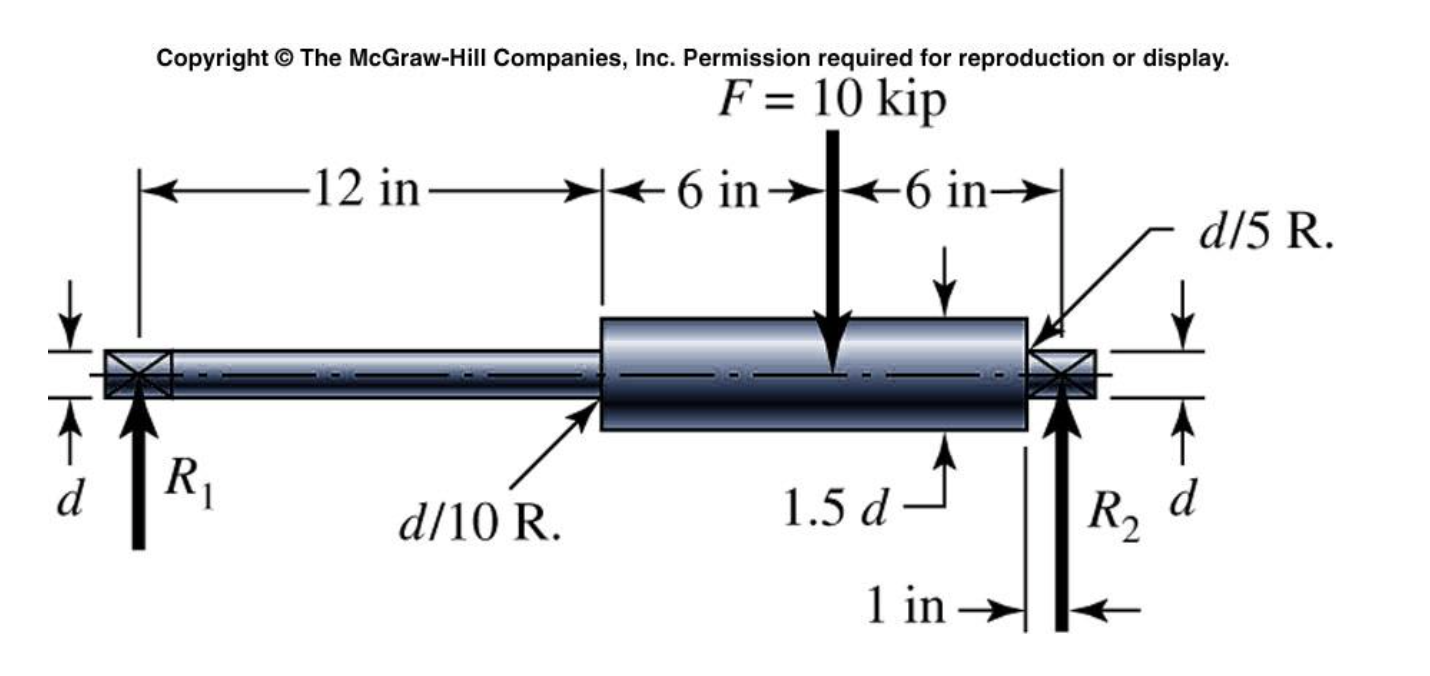

In [9]:
Image(filename='Imagenes Tareas/S12 P2.png')

En primer lugar, se encuentran las reacciones y se establece el número de ciclos estimado

In [15]:
r2 = (10*18)/24
r1 = 10-r2
print('Las reacciones r1 y r2 son',r1,r2,'kip')
N = 1150*120 # Revoluciones
print('El numero de ciclos es de',N,'revoluciones')

Las reacciones r1 y r2 son 2.5 7.5 kip
El numero de ciclos es de 138000 revoluciones


Ahora que se encontraron estos datos, encontramos el diagrama de momento para conocer cuanto es el momento flector en el punto de concentración de esfuerzos. Al igual que en el punto anterior, se usa la plataforma Skyciv.

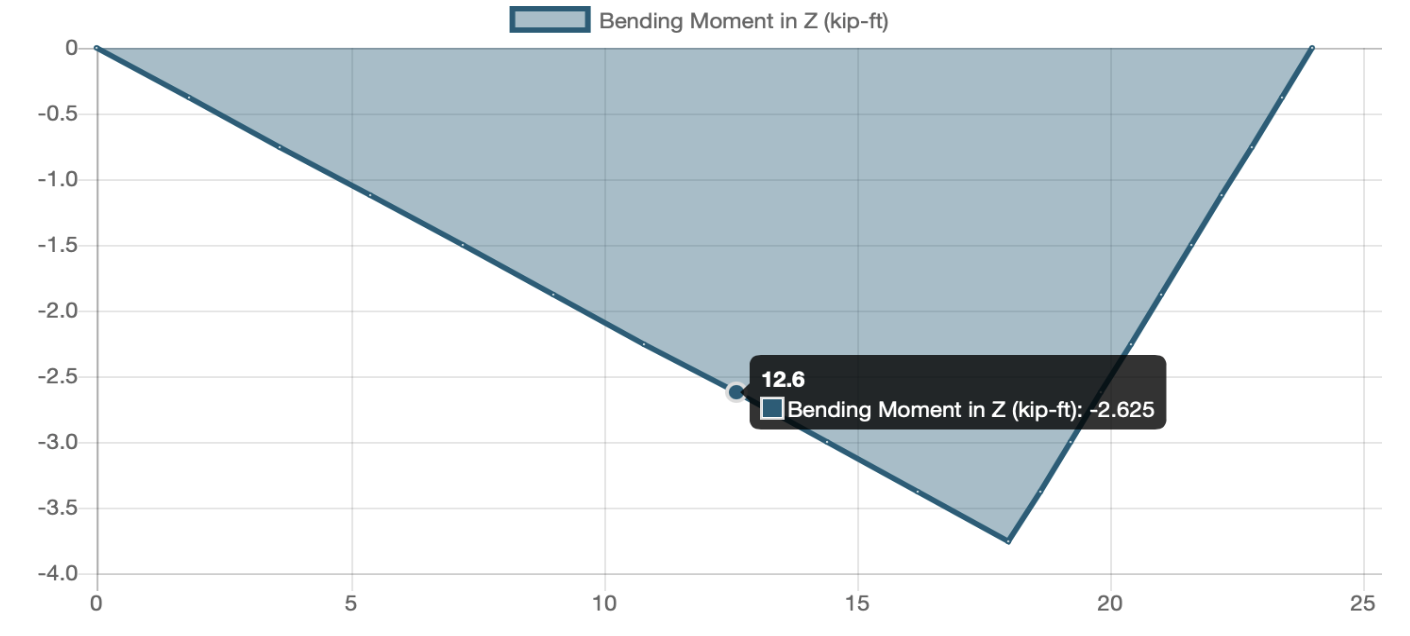

In [14]:
Image(filename='Imagenes Tareas/Momentos S12 P2.png')

Entonces el esfuerzo normal por flexión está dado por la siguiente expresión:
\begin{equation}
    \sigma_{fl} = \frac{Mr}{I}
\end{equation}

Pero el momento de inercia es $I=\pi r^4/4$ entonces la ecuación anterior es:

\begin{equation}
    \sigma_{fl} = \frac{4M}{\pi r^3}
\end{equation}

Este valor sería es esfuerzo nominal. Usando el apéndice del libro para los concentradores de esfuerzos, donde las razones $D/d$ y $r/D$ son de 1.5 y 0.1 respectivamente; lo que resulta en un factor de al rededor de 1.7. 

Con respecto a los factores de marin, se tiene que $k_a = 2.7(S_{ut}^{-0.26})$, por otro lado, para simplificar calculos, se ignoran los otros factores, de tal manera que $S_e = (0.5)(S_{ut})(k_a)$. Una vez el valor de $S_e$ está disponible, se calculan los parámetros $a$ y $b$ de la siguiente ecuación:

\begin{equation}
    \sigma = aN^b
\end{equation}

Como este valor de esfuerzos es el mismo, igualando las ecuaciones se tiene:

\begin{equation}
    aN^b = \frac{4M}{\pi r^3} \quad \therefore \quad r = \sqrt[3]{ \frac{4M}{\pi aN^b} }
\end{equation}

In [20]:
Sut = 99.4 #ksi
f = 0.84 # Tomado del material de apoyo
M = 45
Se = 0.5*Sut*(2.7*(Sut**(-0.26)))
a_a = f*f*Sut*Sut/(Se)
b_b =  -log10(f*Sut/Se)/3
an_b = 1.7*a_a*(N**(b_b)) # Valor del esfuerzo teniendo en cuenta el concentrador de esfuerzos
r = (4*M/(an_b*np.pi))**(1/3)
print('El radio debe ser de',r,'in')
print('Entonces el diametro debe ser de',round(2*r,2),'in')

El radio debe ser de 0.8773094878689356 in
Entonces el diametro debe ser de 1.75 in


# Bomba de transmision por engranajes

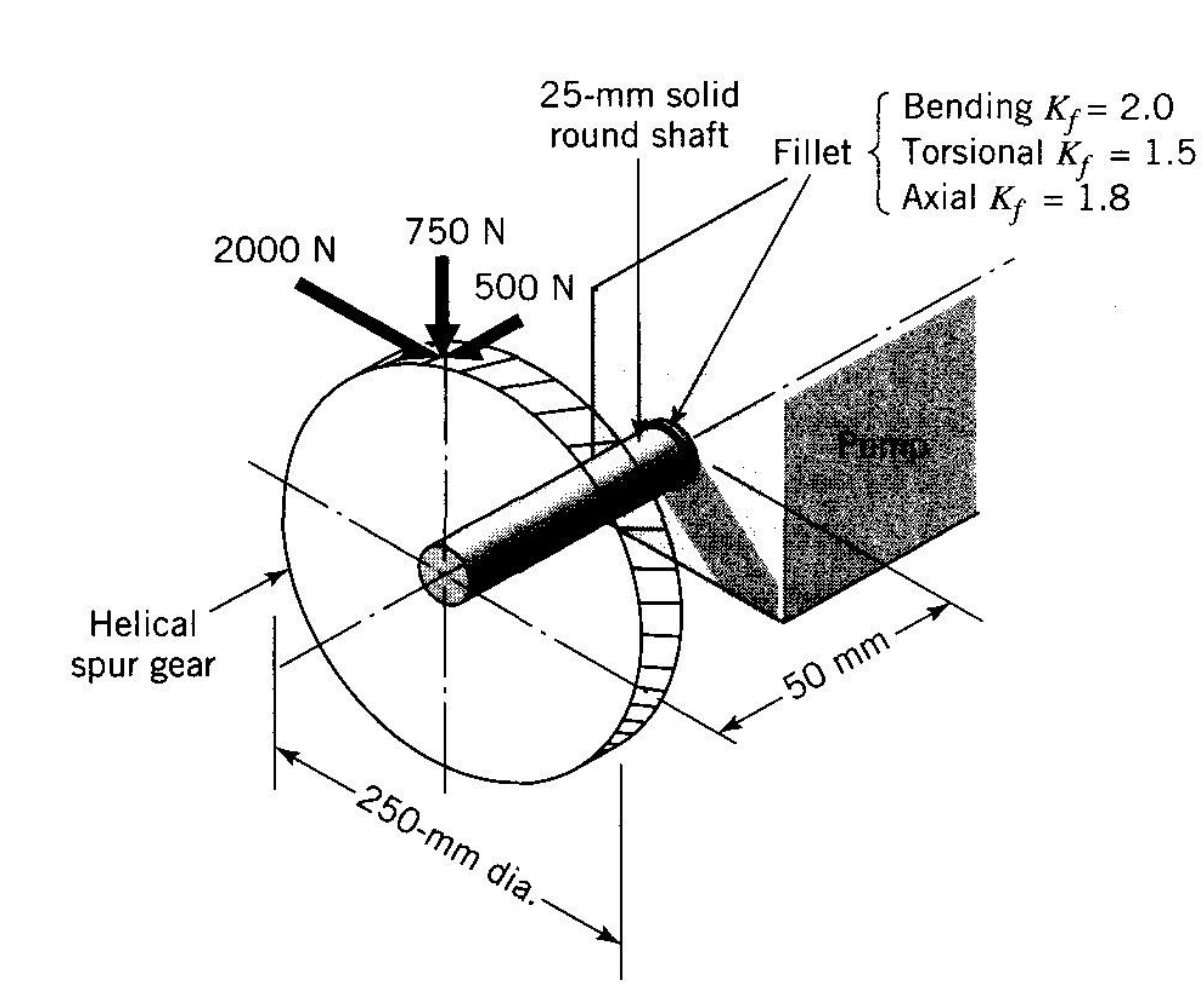

In [21]:
Image(filename='Imagenes Tareas/S12 P3.png')

En este caso se usan las variantes de los esfuerzos de von Misses teniendo en cuenta las fórmulas de la sección 6-14 del libro:
\begin{equation}
    \sigma_{a}' = \sqrt{ k_{f_b} (\sigma_{a_b}) + k_{f_{ax}} \bigg( \frac{\sigma_{a_{ax}}}{0.85} \bigg)^2 + 3(k_{f_t} \tau_{a_t}) } \\
    \sigma_{m}' = \sqrt{  (k_{f_b} (\sigma_{m_b}))^2 + 3(k_{f_t} \tau_{m_t}) }
\end{equation}

Donde los sub-subindices $a$, $b$ y $f$ se refieren a cargas axiales, de flexión y de torisón respectivamente. Ahora, se encontrarán las compontentes de esfuerzos normales. Estos dados por las fuerzas de 500 y 700 N respectivamente para el eje $y$, la fuerza de 2000 N produce un momento en el eje $z$ entonces, se tiene que hacer una suma vectorial con las magnitudes de los momentos dados en estos ejes. Esto se realizará a continuación

In [27]:
r = 25/1000 # Para dejarlo en m
I = np.pi*(r**4)/4
My = 0.125*500 + 750*50/1000 # N·m
Mz = 2000*50/1000 # N·m
M_mag = np.sqrt(My**2 + Mz**2)
print('La magnitud del momento combinado es de',round(M_mag,2),'N·m')
s_momento = M_mag*r/I
s_momento=round(s_momento*1e-6,2)
print('El esfuerzo asociado a este momento es de',s_momento,'MPa')

La magnitud del momento combinado es de 141.42 N·m
El esfuerzo asociado a este momento es de 11.52 MPa


El siguiente esfuerzo normal sobre la pieza es dado por la fuerza de 500 N.

In [41]:
A = np.pi*(r**2)
s_500 = (500 / A)*1e-6 # MPa

El esfuerzo normal constante $\sigma_m$ es la suma de estos esfuerzos. Ahora, para encontrar el esfuerzo por torsión se usa la forumla de torsión:

\begin{equation}
    \tau = \frac{Tr}{J}
\end{equation}

In [31]:
T = 200*0.25
J = I/2
tau = T*r/J
tau = round(tau*1e-6,2)
print('El esfuerzo cortante dado por torsión es',tau,'MPa')

El esfuerzo cortante dado por torsión es 8.15 MPa


Ahora se encontraran las variantes de los esfuerzos de von misses mencionadas en la formula mencionada. Después de esto se encontrará el valor del factor de seguridad usando el criterio de Goodman. Los unicos esfuerzos alternantes son los normales por flexión, y el esfuerzo cortante por torsión es constante. 

In [42]:
kfb,kft,kfa = 2, 1.5, 1.8 # Kf's dados por el enunciado
sa = np.sqrt(  (kfb*s_momento + kfa*s_500/0.85 )**2   )
sb = np.sqrt(3)*kft*tau
S_ult= 1000
k_a = 4.51*(S_ult**(-0.265))
k_b = (25/7.62)**(-0.107)
S_e = 0.5*S_ult*k_a*k_b
n = S_e*S_ult/(sa*S_ult+ sb*S_e)
print('El factor de seguridad es de',n)

El factor de seguridad es de 10.50022408309312


# Problema de Goodman Modificado

A continuación se programarán las funciones que serán útiles para desarrollar el ejercicio

In [66]:
Se, Su, Sy= 276,551, 413 # MPa
f = 0.87 # Sacado del material de apoyo
alt = lambda s: np.sqrt(  (kfb*s[0] + kfa*s[1]/0.85 )**2 + 3*(kft*s[2])**2  )
med = lambda s: np.sqrt( (kfb*s[0] +kfa*s[1])**2 + 3*(kft*s[2])   )
goodman = lambda sa,sm: Se*S_ult/(sa*Su+ sm * Se) # Funcion que retorna el valor del factor de seguridad
a = (f*Su)**2 / Se
b = -log10(f*Su/Se)/3
N = lambda s: (s/a)**(1/b)
rev_eq = lambda sa,sm: sa/(1-sm/Su)

a) 

In [54]:
a1 = alt([172,0,0])
c1 = med([0,0,103]) 
print('El factor de seguridad es de',round(goodman(a1,c1),2))

El factor de seguridad es de 1.41


b)

In [56]:
a2 = alt([69,0,0])
c2 = med([0,0,138]) 
print('El factor de seguridad es de',round(goodman(a2,c2),2))

El factor de seguridad es de 3.33


c)

In [59]:
a3 = alt([83,0,69])
c3 = med([0,0,103]) 
print('El factor de seguridad es de',round(goodman(a3,c3),2))

El factor de seguridad es de 1.96


d)

In [60]:
a4 = alt([0,0,207])
c4 = med([0,0,0]) 
print('El factor de seguridad es de',round(goodman(a4,c4),2))

El factor de seguridad es de 0.93


En estetimo caso, la pieza falla, y usando 207 $MPa$ como el esfuerzo reversible, se calcula la vida útil

In [69]:
print('La vida util de la pieza es de',floor(N(207)),'ciclos')

La vida util de la pieza es de 36583560.0 ciclos
